### QED-C Prototype Benchmarks - Qiskit Version
The notebook contains a suite of prototype application benchmarks for the IBM Qiskit API.
Configure and run the cell below with the desired execution settings.
Then execute the remaining cells, each containing one prototype benchmark program.

In [1]:
min_qubits=20
max_qubits=40
max_circuits=1
num_shots=1000

backend_id=None
provider_backend=None
exec_options=None

# An example using D-Wave Neal simulator
from neal import SimulatedAnnealingSampler
provider_backend = SimulatedAnnealingSampler()
backend_id="pegasus"

# # An example using D-Wave provider
# # Be sure to set the DWAVE_API_TOKEN environment variable
# from dwave.system.samplers import DWaveSampler
# from dwave.system import DWaveSampler
# provider_backend = DWaveSampler()
# backend_id="dwave_qpu"


### Maxcut - Method 1

In [2]:
# import sys
# sys.path.insert(1, "maxcut/qiskit")
# import maxcut_benchmark

# # set noise to None for testing
# import execute
# execute.set_noise_model(None)

# maxcut_benchmark.run(
#     min_qubits=min_qubits, max_qubits=max_qubits, max_circuits=max_circuits, num_shots=num_shots,
#     method=1,
#     backend_id=backend_id, provider_backend=provider_backend,
#     exec_options=exec_options
# )

### Maxcut - Method 2 - Degree 3 - Approximation Ratio as Objective Function

MaxCut Benchmark Program - Ocean
... execution starting at Nov 05, 2022 17:14:35 UTC
... using backend_id = pegasus
************
Executing [1] restarts for num_qubits = 20
===============  Begin method 2 loop, enabling embed
... using anneal time: 1
... submit circuit - group=20 id=1000 shots=1000 params=[1]
  *** ocean.sample() time = 0.7315
... finalize_execution
**** First execution complete, disabling embed
{'approx_ratio': -25.918}
... using anneal time: 2
... submit circuit - group=20 id=1001 shots=1000 params=[2]
  *** ocean.sample() time = 0.22241
... finalize_execution
**** First execution complete, disabling embed
{'approx_ratio': -25.935}
... using anneal time: 4
... submit circuit - group=20 id=1002 shots=1000 params=[4]
  *** ocean.sample() time = 0.22141
... finalize_execution
**** First execution complete, disabling embed
{'approx_ratio': -25.922}
... using anneal time: 8
... submit circuit - group=20 id=1003 shots=1000 params=[8]
  *** ocean.sample() time = 0.2234
... f

C:\Users\toml\QCI-TL\github\QC-App-Oriented-Benchmarks-maxcut-dwave\maxcut\ocean\../../_common\metrics.py:2162: RuntimeWarning: invalid value encountered in true_divide
  group_metrics_optgaps['random_cutsize_ratio_dist']['frequencies'].append(np.array(full_counts_list_unif) / sum(full_counts_list_unif))


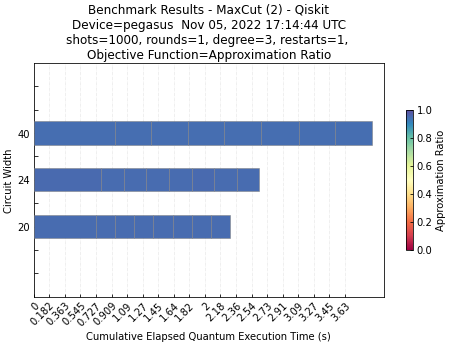

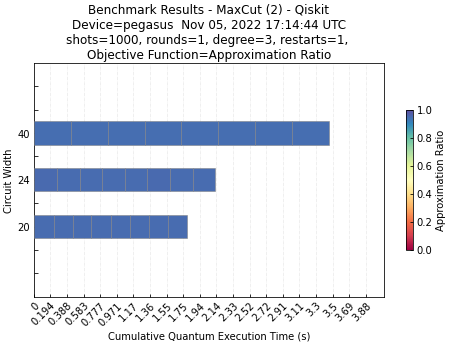

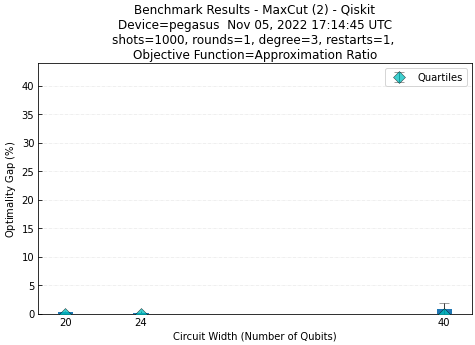

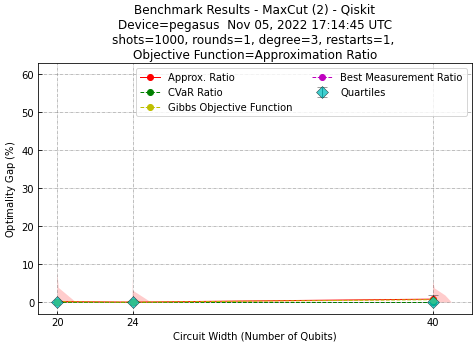

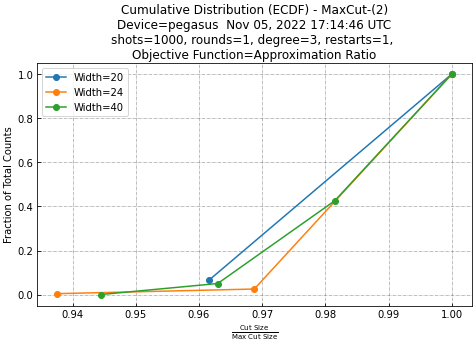

C:\Users\toml\QCI-TL\github\QC-App-Oriented-Benchmarks-maxcut-dwave\maxcut\ocean\../../_common\metrics.py:2162: RuntimeWarning: invalid value encountered in true_divide
  group_metrics_optgaps['random_cutsize_ratio_dist']['frequencies'].append(np.array(full_counts_list_unif) / sum(full_counts_list_unif))


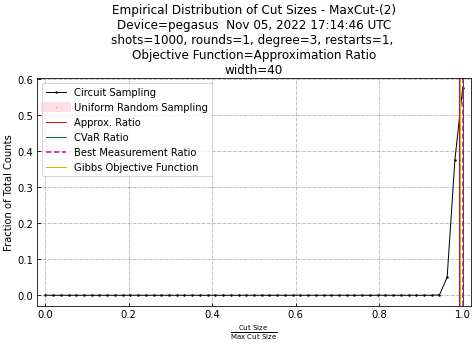

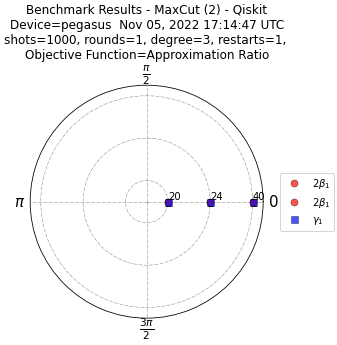

In [3]:
import sys
sys.path.insert(1, "maxcut/qiskit")
import maxcut_benchmark

# set noise to None for testing
# import execute
# execute.set_noise_model(None)

score_metric=['approx_ratio']
#x_metric=['cumulative_elapsed_time', 'cumulative_exec_time', 'cumulative_opt_exec_time']
x_metric=['cumulative_elapsed_time', 'cumulative_exec_time' ]

# Note: the plots produced by this benchmark only use the last of the problems at each width

maxcut_benchmark.run(
    min_qubits=min_qubits, max_qubits=max_qubits, max_circuits=max_circuits, num_shots=num_shots,
    method=2, degree=3,
    score_metric=score_metric, x_metric=x_metric, 
    backend_id=backend_id, provider_backend=provider_backend,
    exec_options=exec_options
)